# Importar librerias necesarias

In [2]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.ma as ma
import seaborn as sns

# Lectura de los datos

Tengo toda la información de curvas de medida en dos ficheros excel, cada uno de los ficheros tiene varias pestañas por lo que tengo que unir toda la información en un solo data frame.

Lo primero de todo es abrir el primer fichero, ver cuantas pestañas tiene y conocer los nombres de cada una de las pestañas.

Por motivos de confidencialidad estos ficheros originales de curvas de consumo horarias por cliente no las puedo subir a github, subiré solo la curva final agregada para 2017 y 2018 por comunidad y por tarifa.

In [2]:
excel_document_17 = openpyxl.load_workbook('./data/Cups2017.xlsx')

In [3]:
excel_document_17.get_sheet_names()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  """Entry point for launching an IPython kernel.


['Page 1', 'Page 2', 'Page 3', 'Page 4']

### Unificar los datos. 

Accedemos al fichero excel y creamos un data frame de cada una de las pestaña, a continuación unimos todos los data frame en uno solo.

In [3]:
xlsx_2017 = pd.ExcelFile('./data/Cups2017.xlsx') 

df1 = pd.read_excel(xlsx_2017, 'Page 1') 
df2 = pd.read_excel(xlsx_2017, 'Page 2') 
df3 = pd.read_excel(xlsx_2017, 'Page 3') 
df4 = pd.read_excel(xlsx_2017, 'Page 4')

In [4]:
pd.read_excel?

Signature: pd.read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, **kwds)
Docstring:
Read an Excel table into a pandas DataFrame

Parameters
----------
io : string, path object (pathlib.Path or py._path.local.LocalPath),
    file-like object, pandas ExcelFile, or xlrd workbook.
    The string could be a URL. Valid URL schemes include http, ftp, s3,
    and file. For file URLs, a host is expected. For instance, a local
    file could be file://localhost/path/to/workbook.xlsx
sheet_name : string, int, mixed list of strings/ints, or None, default 0

    Strings are used for sheet names, Integers are used in zero-indexed
    sheet positions.

    Lists of strings/integers are used to request multiple sheets.

    Specify None t

In [5]:
df_2017 = pd.concat([df1, df2, df3, df4])
df_2017.head(5)

,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--
0,ES0021000000274345SK,0P,2017-01-01,1,0.330,0.42207,0.330
1,ES0021000000274345SK,0P,2017-01-01,2,0.152,0.19456,0.152
2,ES0021000000274345SK,0P,2017-01-01,3,0.273,0.34944,0.273
3,ES0021000000274345SK,0P,2017-01-01,4,0.156,0.19968,0.156
4,ES0021000000274345SK,0P,2017-01-01,5,0.311,0.39808,0.311


Comprobamos que la unión de los ficheros es correcta y que el resultado df_2017 es la suma de los cuatro df anteriores

In [6]:
df1.count()

--Cups20--                        1018179
--Line--                          1018179
--Fecha--                         1018179
--Hora--                          1018179
--Active--                        1018179
--Active With Transport Loss--    1018179
--Active With Transform Loss--    1018179
dtype: int64

In [7]:
df2.count()

--Cups20--                        1030560
--Line--                          1030560
--Fecha--                         1030560
--Hora--                          1030560
--Active--                        1030560
--Active With Transport Loss--    1030560
--Active With Transform Loss--    1030560
dtype: int64

In [8]:
df3.count()

--Cups20--                        820335
--Line--                          820335
--Fecha--                         820335
--Hora--                          820335
--Active--                        820335
--Active With Transport Loss--    820335
--Active With Transform Loss--    820335
dtype: int64

In [9]:
df4.count()

--Cups20--                        837613
--Line--                          837613
--Fecha--                         837613
--Hora--                          837613
--Active--                        837613
--Active With Transport Loss--    837613
--Active With Transform Loss--    837613
dtype: int64

In [10]:
df_2017.count()

--Cups20--                        3706687
--Line--                          3706687
--Fecha--                         3706687
--Hora--                          3706687
--Active--                        3706687
--Active With Transport Loss--    3706687
--Active With Transform Loss--    3706687
dtype: int64

## Hacemos el mismo proceso con el excel de 2018

In [11]:
excel_document_18 = openpyxl.load_workbook('./data/Cups2018.xlsx')
excel_document_18.get_sheet_names()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  


['Page 1', 'Page 2', 'Page 3', 'Page 4', 'Page 5']

In [12]:
xlsx_18 = pd.ExcelFile('./data/Cups2018.xlsx') 
df11 = pd.read_excel(xlsx_18, 'Page 1') 
df22 = pd.read_excel(xlsx_18, 'Page 2') 
df33 = pd.read_excel(xlsx_18, 'Page 3') 
df44 = pd.read_excel(xlsx_18, 'Page 4') 
df55 = pd.read_excel(xlsx_18, 'Page 5')
df_2018 = pd.concat([df11, df22, df33, df44, df55])
df_2018.head(5)

,--Cups20--,--Line--,--Fecha--,--Hora--,--Active--,--Active With Transport Loss--,--Active With Transform Loss--
0,ES0021000004654210GL,0P,2018-01-01,1,0.0,0.0,0.0
1,ES0021000004654210GL,0P,2018-01-01,2,0.0,0.0,0.0
2,ES0021000004654210GL,0P,2018-01-01,3,0.0,0.0,0.0
3,ES0021000004654210GL,0P,2018-01-01,4,0.0,0.0,0.0
4,ES0021000004654210GL,0P,2018-01-01,5,0.0,0.0,0.0


# Unimos tanto el fichero de 2017 como el de 2018 y creamos un único fichero con las medidas de ambos años

Comprobamos que el fichero final es efectivamente la suma de los dos ficheros originales.

In [13]:
Medidas = pd.concat([df_2017, df_2018])

In [14]:
df_2017.shape

(3706687, 7)

In [15]:
df_2018.shape

(4118516, 7)

In [16]:
Medidas.shape

(7825203, 7)

### Formato

Damos un formato mas amigable al fichero cambiando los nombres de las columnas y dando formato fecha correcto.


In [17]:
Medidas = Medidas.rename(columns={'--Cups20--' : 'Cups20',
                                  '--Line--' : 'Line', 
                                  '--Fecha--' : 'Fecha', 
                                  '--Hora--' : 'Hora', 
                                  '--Active--' : 'Active' , 
                                  '--Active With Transport Loss--' : 'Active With Transport Loss', 
                                  '--Active With Transform Loss--' : 'Active With Transform Loss'})

In [18]:
Medidas.head(5)

,Cups20,Line,Fecha,Hora,Active,Active With Transport Loss,Active With Transform Loss
0,ES0021000000274345SK,0P,2017-01-01,1,0.330,0.42207,0.330
1,ES0021000000274345SK,0P,2017-01-01,2,0.152,0.19456,0.152
2,ES0021000000274345SK,0P,2017-01-01,3,0.273,0.34944,0.273
3,ES0021000000274345SK,0P,2017-01-01,4,0.156,0.19968,0.156
4,ES0021000000274345SK,0P,2017-01-01,5,0.311,0.39808,0.311


In [19]:
Medidas['Fecha']=pd.to_datetime(Medidas['Fecha'], yearfirst=True,format='%Y-%m-%d')


In [20]:
Medidas.dtypes

Cups20                                object
Line                                  object
Fecha                         datetime64[ns]
Hora                                   int64
Active                               float64
Active With Transport Loss           float64
Active With Transform Loss           float64
dtype: object

In [21]:
Medidas.head(5)

,Cups20,Line,Fecha,Hora,Active,Active With Transport Loss,Active With Transform Loss
0,ES0021000000274345SK,0P,2017-01-01,1,0.330,0.42207,0.330
1,ES0021000000274345SK,0P,2017-01-01,2,0.152,0.19456,0.152
2,ES0021000000274345SK,0P,2017-01-01,3,0.273,0.34944,0.273
3,ES0021000000274345SK,0P,2017-01-01,4,0.156,0.19968,0.156
4,ES0021000000274345SK,0P,2017-01-01,5,0.311,0.39808,0.311


# Contratos

A este fichero de medidas le falta información, como la provincia por cliente, la tarifa contratada, o la potencia. Todos estos datos los conseguimos del excel de contratos que vamos a unir a este fichero según el CUPS.

In [22]:
contratos = pd.read_excel('./data/Contratos.xlsx')
contratos.head(5)

,CUPS 20,Tarifa,Provincia,Potencia
0,ES0021000000472013PG,2.0.A,Alicante,6.60
1,ES0021000000951307DR,2.1.A,Alicante,13.20
2,ES0021000003992036XS,2.0.A,Madrid,3.30
3,ES0021000004049366LY,2.0.A,Madrid,3.45
4,ES0021000004146547NN,2.0.A,Madrid,3.45


In [23]:
contratos = contratos.rename(columns={'CUPS 20' : 'Cups20'})
contratos.head(5)

,Cups20,Tarifa,Provincia,Potencia
0,ES0021000000472013PG,2.0.A,Alicante,6.60
1,ES0021000000951307DR,2.1.A,Alicante,13.20
2,ES0021000003992036XS,2.0.A,Madrid,3.30
3,ES0021000004049366LY,2.0.A,Madrid,3.45
4,ES0021000004146547NN,2.0.A,Madrid,3.45


In [24]:
Medidas.shape

(7825203, 7)

Comprobamos que despues del merge tengo las mismas líneas que tenía antes, y que no tengo ningún valor NaN

In [25]:
Medidas = Medidas.merge(contratos, on='Cups20', how='left')


In [26]:
Medidas.shape

(7825203, 10)

In [27]:
Medidas.isnull().any().any()

False


### Limpieza de datos

Vamos a ver las columnas que tiene el data frame y vamos a quedarnos solo con las necesarias para el analisis.


In [28]:
Medidas.columns

Index(['Cups20', 'Line', 'Fecha', 'Hora', 'Active',
       'Active With Transport Loss', 'Active With Transform Loss', 'Tarifa',
       'Provincia', 'Potencia '],
      dtype='object')

In [29]:
Medidas = Medidas[['Cups20', 'Tarifa', 'Provincia','Fecha', 'Hora', 'Active', 'Potencia ']]
Medidas.head(5)

,Cups20,Tarifa,Provincia,Fecha,Hora,Active,Potencia
0,ES0021000000274345SK,2.1.A,Albacete,2017-01-01,1,0.330,13.2
1,ES0021000000274345SK,2.1.A,Albacete,2017-01-01,2,0.152,13.2
2,ES0021000000274345SK,2.1.A,Albacete,2017-01-01,3,0.273,13.2
3,ES0021000000274345SK,2.1.A,Albacete,2017-01-01,4,0.156,13.2
4,ES0021000000274345SK,2.1.A,Albacete,2017-01-01,5,0.311,13.2




# Agrupamos por Fecha, Hora, Provincia, Tarifa

Por motivmos de confidencialidad no puedo mostrar el origen de los datos, que son curvas de consumo horario por CUPS. Sin embargo a partir de ahora trabajermos con curvas de consumo horario agrupadas por estos campos que son suficientes para el desarrollo del modelo.


In [30]:
Medidas.shape

(7825203, 7)

Como no tengo curva de consumo completa para todos los puntos para todas las horas de los dos años, voy a calcular el número de puntos por hora y la suma de la energía para cada hora, de esta manera si divido la suma de la energía entre el número de puntos, tendría un consumo medio para cada uno de los grupos que voy a tener.

In [31]:
puntos = Medidas.groupby(['Provincia', 'Fecha', 'Hora'], sort=True).count()

puntos = puntos.reset_index()


In [32]:
puntos.head()

,Provincia,Fecha,Hora,Cups20,Tarifa,Active,Potencia
0,Albacete,2017-01-01,1,6,6,6,6
1,Albacete,2017-01-01,2,6,6,6,6
2,Albacete,2017-01-01,3,6,6,6,6
3,Albacete,2017-01-01,4,6,6,6,6
4,Albacete,2017-01-01,5,6,6,6,6


In [33]:
Medidas_procesadas=Medidas.groupby(['Provincia', 'Fecha', 'Hora'])[['Active']].agg(['sum', 'count'])

In [34]:
Medidas_procesadas=Medidas_procesadas.reset_index()


In [35]:
Medidas_procesadas.head()
Medidas_procesadas.to_excel('Medidas_procesadas.xlsx')

In [36]:
puntos = Medidas.groupby(['Provincia', 'Fecha', 'Hora'], sort=True)
Medida_procesada=(puntos['Active'].agg([ma.count, np.sum]).rename(columns={'count':'NºClientes','sum':'Activa'}) )
Medida_procesada['Tanto1']=Medida_procesada['Activa']/Medida_procesada['NºClientes']

Medida_procesada.describe()

,NºClientes,Activa,Tanto1
count,455212.000000,455212.000000,455212.000000
mean,17.190239,1082.425789,21.187453
std,21.293400,9862.110741,147.957102
min,1.000000,0.000000,0.000000
25%,2.000000,1.638000,0.340500
50%,7.000000,5.298000,0.732256
75%,26.000000,17.596250,1.545513
max,92.000000,159104.177000,3578.000000


In [37]:
Medida_procesada=Medida_procesada.reset_index()
Medida_procesada.head(5)

,Provincia,Fecha,Hora,NºClientes,Activa,Tanto1
0,Albacete,2017-01-01,1,6.0,5.655,0.942500
1,Albacete,2017-01-01,2,6.0,5.413,0.902167
2,Albacete,2017-01-01,3,6.0,4.190,0.698333
3,Albacete,2017-01-01,4,6.0,3.974,0.662333
4,Albacete,2017-01-01,5,6.0,3.645,0.607500


In [38]:
Comunidad = pd.read_excel('./data/Comunidades.xlsx')
Comunidad.head(5)

,Provincia,Comunidad,Zona
0,Albacete,Castilla la Mancha,Centro
1,Alicante,Comunidad Valenciana,Centro
2,Almería,Andalucía,Sur
3,Badajoz,Extremadura,Centro
4,Barcelona,Cataluña,Norte


In [39]:
Medida_procesada = pd.merge(Medida_procesada, Comunidad, on='Provincia')
Medida_procesada.head(5)

,Provincia,Fecha,Hora,NºClientes,Activa,Tanto1,Comunidad,Zona
0,Albacete,2017-01-01,1,6.0,5.655,0.942500,Castilla la Mancha,Centro
1,Albacete,2017-01-01,2,6.0,5.413,0.902167,Castilla la Mancha,Centro
2,Albacete,2017-01-01,3,6.0,4.190,0.698333,Castilla la Mancha,Centro
3,Albacete,2017-01-01,4,6.0,3.974,0.662333,Castilla la Mancha,Centro
4,Albacete,2017-01-01,5,6.0,3.645,0.607500,Castilla la Mancha,Centro


In [40]:
Medida_procesada.index=Medida_procesada['Fecha']
Medida_procesada.head(5)

,Provincia,Fecha,Hora,NºClientes,Activa,Tanto1,Comunidad,Zona
Fecha,,,,,,,,
2017-01-01,Albacete,2017-01-01,1,6.0,5.655,0.942500,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,2,6.0,5.413,0.902167,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,3,6.0,4.190,0.698333,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,4,6.0,3.974,0.662333,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,5,6.0,3.645,0.607500,Castilla la Mancha,Centro


In [41]:
Medida_procesada['Fecha']=pd.to_datetime(Medida_procesada['Fecha'], yearfirst=True,format='%Y-%m-%d')

In [42]:
Medida_procesada.head(5)

,Provincia,Fecha,Hora,NºClientes,Activa,Tanto1,Comunidad,Zona
Fecha,,,,,,,,
2017-01-01,Albacete,2017-01-01,1,6.0,5.655,0.942500,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,2,6.0,5.413,0.902167,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,3,6.0,4.190,0.698333,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,4,6.0,3.974,0.662333,Castilla la Mancha,Centro
2017-01-01,Albacete,2017-01-01,5,6.0,3.645,0.607500,Castilla la Mancha,Centro


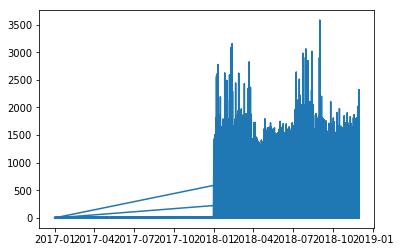

In [43]:
plt.plot(Medida_procesada['Tanto1'])

En el grafico podemos ver claramente que nuestros datos no son lo esperado, que esta curva no tienen ningún sentido, y que ni mucho menos tiene estacionalidad.

In [44]:
Medida_procesada.to_csv('./data_processed/Medida_procesada.csv')